# Análise exploratoria

## Análise de notas por gênero de filme
O objetivo desta análise é observar como as avaliações estão dispostas por gênero de filme.

### Histograma da contagem de notas  por gênero de filme.

![title](histogramWithRatesDividedBetweenLowerThanThreeAndEqualOrGreaterThanThreeByGenreMovie.png)

Analisando este histograma pode-se observar que a maioria dos usuários da notas altas para os filmes independente do gênero. 

### Matriz mostrando a relação de gêneros de filmes mais votados por usuários que mais votaram em um determinado gênero de filme

![title](matrixWithPlotThatShowThePercentageOfMoviesGenresMoreViewedByPeopleThatViewMoreOneMovieGenre.png)

Cada gênero de filme foi transformado para um número inteiro que vai de a 19, para assim mapeá-lo para linhas e colunas da matriz mostrada antes. A tabela a seguir mostra esta relação

| Gênero de filme   | Número mapeado   |
|-------------------|------------------|
|(no genres listed) | 0                |
| Action            | 1                |
| Adventure         | 2                |
| Animation         | 3                |
| Children          | 4                | 
| Comedy            | 5                |
| Crime             | 6                |
| Documentary       | 7                |
| Drama             | 8                |
| Fantasy           | 9                |
| Film-Noir         | 10               |
| Horror            | 11               |
| IMAX              | 12               |
| Musical           | 13               |
| Mystery           | 14               |
| Romance           | 15               |
| Sci-Fi            | 16               |
| Thriller          | 17               |
| War               | 18               |
| Western           | 19               |




Nesta matriz cada a linha indica um grupo de usuários, este grupo é formado com base no gênero de filme mais votado pelos usuários. As linhas da matriz indicam portanto gênero de filme mais votado. Deste modo a célula i,j representa a porcentagem de usuários do grupo i que votaram no gênero j, considerando-se i como o índice do número de linhas da matriz e j como o índice das colunas da matriz. Por esta razão pode-se ver que as células da diagonal da matriz possuem os maiores valores.


Foram computados apenas os votos maiores ou iguais a três, pois considerou-se apenas votos maiores ou iguais a três como avaliações positivas.  



## Análise de Genome-Scores
O objetivo desta análise é ver o quanto é o ganho das componentes principais dos descritores Genome-Scores, para diminuir a dimensionalidade dos descritores Genome-Scores. O que a PCA faz é recombinar descritores de modo que os descritores da PCA que estão no inicio do vetor da PCA possuem o maiores ganhos de informação do que descritores que estão no final do vetor. A seguir esta um gráfico mostrando o ganho de informação por número de componentes de PCA utilizados. 

### Ganho das primeiras N componentes da PCA 
![title](informationPCA.svg)

Observando este gráfico pode-se notar que utilizando os componentes da PCA pode-se reduzir o número de dimensões para um terço sem muita perda de informação.


## Análise de notas por usuario


Foi observado que o gosto dos usuários para um mesmo filme é muito variado, por causa do valor da entropia media que os filmes possuem para suas notas. A entropia mede a desordem em um sistema, quanto maior a entropia maior a desordem, para a entropia da informação o valor máximo que pode ser obtido é 1, que significa completa desordem, e o valor mínimo é 0. A entropia media registrada foi de 0.785 com um desvio padrão de 0.354, considerando que o valor máximo para entropia é 1 isto significa que a entropia média foi alta.

A entropia alta dificultou a criação de uma arquitetura onde um haveria modelos de predição de notas comuns para todos os usuários, nesta arquitetura cada gênero de filme teria uma modelo próprio de predição de notas e todos os usuários utilizaram estes modelos. A arquitetura criada foi um modelo de predição de notas para cada usuário, que conforme mostrado no documento de descrição do sistema de recomendação obteve bons resultados, isto foi possível porque conforme mostrado no histograma uma parcela significativa dos usuários possuem muitos votos.

### Histograma, em escala logarítmica, mostrando quantos usuários possuem uma determinada quantidade votos.


![title](histogramForQtyVotesGroupedBy600.png)

Observando o histograma é possível notar que mais da metade dos usuários votaram mais que 50 vezes, desta forma um número razoável de usuários tem uma quantidade de informação significa com relação ao seu gosto de filmes. Portanto a arquitetura de utilizar um modelo para cada usuário apresenta um bom resultado.





# Modelagem para de um banco de dados relacional dos dados contidos na base de dados

Para facilitar a manipulação dos dados da base ml-20m foi criado um banco de dados relacional no MySQL. A seguir esta o diagrama do banco.

![title](databaseERDiagram.svg)



A coluna idrand da tabela ratings é utilizada para que com um baixo custo computacional seja possível fazer uma consulta que traga elementos aleatórios desta tabela. A coluna cluster é utilizada para 



# Sistema de recomendação

Foram pensadas em arquiteturas para o sistema. A arquitetura 1 usa aprendizado supervisionado, a arquitetura 2 usa aprendizado não supervisionado e a arquitetura 3 não usa nenhum algoritmo de aprendizado de máquina. Devido o resultado ruim que as arquiteturas 1 e 2 tiveram em seu teste de acurácia o sistema de recomendação foi feito utilizando a arquitetura 3.

## Arquitetura 1
A arquitetura do sistema de recomendação consiste em treinar um modelo de aprendizado supervisionado para cada usuario. Foram analisados quatro modelos de aprendizado supervisionado: KNN, Arvores de decisão, redes neurais e SVM. Para criterio de seleção foi analisado a acuracia de cada algoritmo, para cada algoritimo gerando  4 modelos de predição diferentes para cada usuario, atravês da metodologia K-fold, considerando a acuracia de todos os modelos gerados pelo algoritmo.


A seguir esta um código que fez uma analise de acuracia destes quatro modelos, para esta analise os usuarios foram dividos em grupos com cada grupo tendo 20 vinte usuarios. Os grupos são dividos com base na quantidade de filmes que um usuario votou. A entrada de dados para o algoritmos de aprendizagem são os valores de genome score de um filme filtrados por uma PCA, isto permite tirar ruidos dos dados e reduz o custo computacional dos modelos. 

Foi também medido o tempo que cada algoritmo levou, isto foi feito para analisar o custo computacional de cada algoritmo.



In [ ]:
import random
import sys
import time
import csv
import numpy as np
import mysql.connector

from datetime import datetime
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

def shuffleVector(vector):
    vectorT=np.copy(vector)
    for i in range(len(vectorT)*4):
        position1ForUsersList=random.randint(0,len(vectorT)-1)
        position2ForUsersList=random.randint(0,len(vectorT)-1)
        userTemp=vectorT[position1ForUsersList]
        vectorT[position1ForUsersList]=vectorT[position2ForUsersList]
        vectorT[position2ForUsersList]=userTemp
    return vectorT
        
def selectInDataBase(sqlConnection, select):
    cursor = sqlConnection.cursor()
    cursor.execute (select)
    fields = map(lambda x:x[0], cursor.description)
    fields=[]
    for x in cursor.description:
        fields.append(x[0])
    ret=[]
    for data in cursor.fetchall():
        line={}
        for i in range(len(fields)):
            line[fields[i]]=data[i]
        ret.append(line)
    return ret

class Classifier:
    def __init__(self,sqlConnection):
        self.sqlConnection=sqlConnection
        self.descriptorsNumber= selectInDataBase(sqlConnection, "SELECT count(*) as descriptorsNumber FROM elo7_datascience.genome_tags;" )[0]["descriptorsNumber"]
        cursor = sqlConnection.cursor()
        self.descriptorsForAllMovies={}
        cursor.execute("SELECT idmovie,valuesdata FROM elo7_datascience.genome_scores_pca_at_one_line")
        for idmovie,valuesdata in cursor:
            descriptors=np.zeros(self.descriptorsNumber,dtype=np.float)
            descriptorsAtString=list(csv.reader([valuesdata]))[0]
            for j in range(self.descriptorsNumber):
                descriptors[j]=float(descriptorsAtString[j])

            self.descriptorsForAllMovies[idmovie]=descriptors
        

    def execute(self,clfFactory,idUsers):
        cursor = self.sqlConnection.cursor()
        progress=0
        acuracy=[]
        acuracyMinusProportionForMajorityClass=[]
        errorToApplyPCA=0
        descriptorsNumber=self.descriptorsNumber
        descriptorsNumber=384
        timeToTrain=[]
        timeToPredict=[]
        for iduser in idUsers:
            progress=progress+1
            #print("number of users processed: {d0}|{d1}".format(d0=progress,d1=len(idUsers)))
            sys.stdout.flush()            
            
            sqlToKnowLinesReturned = """SELECT count(*) as nLines FROM  ratings r1                                        
                                        where  r1.iduser={iduser}  order by r1.idrand """.format(iduser=iduser)        
            #print(sqlToKnowLinesReturned)                                    
            nLinesReturnedBySelect=selectInDataBase(self.sqlConnection, sqlToKnowLinesReturned)[0]["nLines"]

            #sqlSelectAllmoviesThatAUserVoted => Return all movies that a user voted and the genome metrics
            #                                    this metrics are used by clf to train e predict the rate that
            #                                    a user give to a movie based on  genome metrics.
            #                                    each line returned have the movie rate (rating) and the id for 
            #                                    the movie.
            sqlSelectAllmoviesThatAUserVoted =   """SELECT r1.idmovie,rating FROM  ratings r1 
                                                    where  r1.iduser={iduser} """.format(iduser=iduser)

            cursor.execute (sqlSelectAllmoviesThatAUserVoted)
            descriptors=np.zeros((nLinesReturnedBySelect,descriptorsNumber),dtype=np.float)
            ratings=np.zeros(nLinesReturnedBySelect,dtype=np.int32)
            currentLine=0 #current line for data requested from cursor
            for (idmovie, rating) in cursor:
                if(idmovie in self.descriptorsForAllMovies):
                    descriptors[currentLine]=np.copy(self.descriptorsForAllMovies[idmovie])[:descriptorsNumber]
                    if(rating>=3.0):
                        ratings[currentLine]=1
                    else:
                        ratings[currentLine]=0
                    #ratings[currentLine]=(int(float(rating)*2))        
                    currentLine=currentLine+1   
            
            if(currentLine==0):
                continue
            ratings=ratings[:currentLine]
            descriptors=descriptors[:currentLine]
            
            descriptorsForLearningAlgorithm= descriptors
               
            kf = KFold(n_splits=4,shuffle=True,random_state=3223)
            
            for train_index, test_index in kf.split(descriptorsForLearningAlgorithm):
            
                X_train,X_test,  = descriptorsForLearningAlgorithm[train_index], descriptorsForLearningAlgorithm[test_index]
                y_train,y_test  = ratings[train_index], ratings[test_index]                       
                clf=clfFactory()
                t1=time.time()
                clf.fit(X_train,y_train)                
                t2=time.time()
                timeToTrain.append(t2-t1)

                #get acuracy to classifier make from majority class===========
                majorityClass =float(np.bincount(np.array(np.array(y_train)*2,dtype=np.int32)).argmax())/2.0
                acuracyTempMajorityClass=0.0
                for i in range(len(y_test)):
                    if(abs(y_test[i]-majorityClass)<1.0):
                        acuracyTempMajorityClass=acuracyTempMajorityClass+1.0
                acuracyTempMajorityClass=acuracyTempMajorityClass/float(len(y_test))
                acuracyMinusProportionForMajorityClass.append(acuracyTempMajorityClass)
                #end==========================================================
                t1=time.time()
                #get acuracy from model=======================================
                acuracyTemp=0.0
                for i in range(len(X_test)):
                    if(abs(clf.predict([X_test[i]])[0]-y_test[i])<1.0):
                        acuracyTemp=acuracyTemp+1.0
                acuracy.append(acuracyTemp/float(len(X_test)))
                #end==========================================================
                t2=time.time()
                timeToPredict.append(t2-t1)
                
        print("") 
        return {"acuracy":acuracy,"acuracyMinusProportionForMajorityClass":acuracyMinusProportionForMajorityClass,"errorToApplyPCA":errorToApplyPCA, "timeToPredict": timeToPredict, "timeToTrain":timeToTrain}

if __name__ == "__main__":
    random.seed(322442)
    mydb = mysql.connector.connect(
        host="localhost",
        user="root",
        passwd="123456",
        database="elo7_datascience",
        get_warnings=False,
        raise_on_warnings=False
    )
    cursor = mydb.cursor()
    cursor.execute("""SELECT count(*) as qtdVotes ,iduser FROM ratings 
                      group by iduser """)
    
    #choose users groups for test the learning algorithm ===============================
    #the criterion for choosing is the numbers of votes=================================
    #that a user give.==================================================================
    users=[]
    
    usersWithMoreThan3000Votes=[]
    usersWithMoreThan2000AndLessThanOrEqualTo3000Votes=[]
    usersWithMoreThan1000AndLessThanOrEqualTo2000Votes=[]
    usersWithMoreThan500AndLessThanOrEqualTo1000Votes=[]
    usersWithMoreThan250AndLessThanOrEqualTo500Votes=[]
    usersWithMoreThan100AndLessThanOrEqualTo250Votes=[]
    usersWithMoreThan50AndLessThanOrEqualTo100Votes=[]
    usersWithLessThan50Votes=[]
    for qtdVotes,iduser in cursor:
        if(qtdVotes>3000):    
            usersWithMoreThan3000Votes.append(iduser)
            
        elif(qtdVotes>2000 and qtdVotes<=3000):
            usersWithMoreThan2000AndLessThanOrEqualTo3000Votes.append(iduser)           
        elif(qtdVotes>1000 and qtdVotes<=2000):
            usersWithMoreThan1000AndLessThanOrEqualTo2000Votes.append(iduser)         
        elif(qtdVotes>500 and qtdVotes<=1000):
            usersWithMoreThan500AndLessThanOrEqualTo1000Votes.append(iduser)            
        elif(qtdVotes>250 and qtdVotes<=500):
            usersWithMoreThan250AndLessThanOrEqualTo500Votes.append(iduser)            
        elif(qtdVotes>100 and qtdVotes<=250):
            usersWithMoreThan100AndLessThanOrEqualTo250Votes.append(iduser)     
        elif(qtdVotes>50 and qtdVotes<=100):
            usersWithMoreThan50AndLessThanOrEqualTo100Votes.append(iduser)
        elif(qtdVotes<50):
            usersWithLessThan50Votes.append(iduser)

    #end===============================================================================
    shuffleUser=False
    
    #shiffle vectors with users===================================
    if(shuffleUser):
        usersWithMoreThan3000Votes=shuffleVector(usersWithMoreThan3000Votes)
        usersWithMoreThan2000AndLessThanOrEqualTo3000Votes=shuffleVector(usersWithMoreThan2000AndLessThanOrEqualTo3000Votes)
        usersWithMoreThan1000AndLessThanOrEqualTo2000Votes=shuffleVector(usersWithMoreThan1000AndLessThanOrEqualTo2000Votes)
        usersWithMoreThan500AndLessThanOrEqualTo1000Votes=shuffleVector(usersWithMoreThan500AndLessThanOrEqualTo1000Votes)
        usersWithMoreThan250AndLessThanOrEqualTo500Votes=shuffleVector(usersWithMoreThan250AndLessThanOrEqualTo500Votes)
        usersWithMoreThan100AndLessThanOrEqualTo250Votes=shuffleVector(usersWithMoreThan100AndLessThanOrEqualTo250Votes)
        usersWithMoreThan50AndLessThanOrEqualTo100Votes=shuffleVector(usersWithMoreThan50AndLessThanOrEqualTo100Votes)
        usersWithLessThan50Votes=shuffleVector(usersWithLessThan50Votes)
    #end==========================================================
    knnFactory  = lambda : neighbors.KNeighborsClassifier(7)
    svcFactory  = lambda : SVC(degree=3, gamma='auto', kernel='poly')
    treeFactory = lambda : tree.DecisionTreeClassifier()
    MLPFactory  = lambda : MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(64,128,128, 64), random_state=1)
    GaussianNBFactory =  lambda : GaussianNB()
    classifier=Classifier(mydb)
    algorithmsToLearning=[{"name":'KNN',"algorithm":knnFactory},
                          {"name":'SVM',"algorithm":svcFactory},
                          {"name":'Arvore de decisão',"algorithm":treeFactory},
                          {"name":'Redes neurais',"algorithm":MLPFactory}
                          ]
    algorithmsToLearning=[ {"name":'Arvore de decisão',"algorithm":treeFactory}]
    #algorithmsToLearning=[{"name":'Gaussian',"algorithm":GaussianNBFactory}]
    dataSets=[{"name":"Usuários com mais do que 3000 votos","data": usersWithMoreThan3000Votes},
              {"name":"Usuários com mais do que 2000 votos e igual ou menos que 3000","data": usersWithMoreThan2000AndLessThanOrEqualTo3000Votes},
              {"name":"Usuários com mais do que 1000 votos e igual ou menos que 2000","data":usersWithMoreThan1000AndLessThanOrEqualTo2000Votes},
              {"name":"Usuários com mais do que 500 votos e igual ou menos que 1000","data":usersWithMoreThan500AndLessThanOrEqualTo1000Votes},
              {"name":"Usuários com mais do que 250 votos e igual ou menos que 500","data":usersWithMoreThan250AndLessThanOrEqualTo500Votes},
              {"name":"Usuários com mais do que 100 votos e igual ou menos que 250","data":usersWithMoreThan100AndLessThanOrEqualTo250Votes},
              {"name":"Usuários com mais do que 50 votos e igual ou menos que 100","data":usersWithMoreThan50AndLessThanOrEqualTo100Votes},
              {"name":"Usuários com menos do que 50","data":usersWithLessThan50Votes}]
    for algorithmToLearning in algorithmsToLearning:
        print("==================================================================")
        print("nome do algoritmo:"+algorithmToLearning['name'])

        for dataSet in dataSets:

            acuracyInformation=classifier.execute(algorithmToLearning["algorithm"],dataSet["data"][:20])#just twenty user at a group are choosed to the test.
            print(dataSet["name"]+":")
            print("    Média para acurácia:"+ str( np.mean(np.array(acuracyInformation["acuracy"],dtype=float))))
            print("    Desvio padrão para acurácia:"+ str( np.std(np.array(acuracyInformation["acuracy"],dtype=float))))
            print("    Média para (acuracia - porcentagem da classe majoritária):"+ str( np.mean(np.array(acuracyInformation["acuracyMinusProportionForMajorityClass"],dtype=float))))
            print("    Desvio padrão  (acurácia - porcentagem da classe majoritária):"+str( np.std(np.array(acuracyInformation["acuracyMinusProportionForMajorityClass"],dtype=float))))
            print("    Média tempo para treinar  (s):"+str( np.mean(np.array(acuracyInformation["timeToTrain"],dtype=float))))
            print("    Desvio padrão do tempo para treinar (s):"+str( np.std(np.array(acuracyInformation["timeToTrain"],dtype=float))))
            print("    Média tempo para testar modelo  (s):"+str( np.mean(np.array(acuracyInformation["timeToPredict"],dtype=float))))
            print("    Desvio padrão do tempo para testar modelo (s):"+str( np.std(np.array(acuracyInformation["timeToPredict"],dtype=float))))
        print("==================================================================")
    

### Considerações sobre os resultados do script anterior

A técnica não apresentou grandes resultados tendo um acurácia próxima de um sistema que usaria a classe majoritária para predizer a nota dos filmes.

## Arquitetura 2

A segunda arquitetura usa um aprendizado não supervisionado onde os usuários são grupados por meio do algoritmo de K-médias, o critério de agrupamento é determinado por um vetor que diz em quantos de votos cada usuário deu para um determinado gênero de filme. Assim a predição da nota que usuario daria para um filme  é feita com base na média das notas que o usuários do mesmo grupo deram para aquele filme.

Para realizar os testes de acurácia nesta arquitetura foi utilizada metodologia de K-folds, nesta metodologia em cada fold foi realizado um agrupamento de usuários. O que difere um agrupamento do outro é que os filmes utilizados para o teste tem seus votos retirados do vetor de votos do usuário que esta sendo utilizado para fazer o teste. A seguir esta o script que implementa esta arquitetura.



In [ ]:
import random
import sys
import time
import csv
import numpy as np
import mysql.connector

from datetime import datetime
from sklearn.model_selection import KFold


import tensorflow as tf

def shuffleVector(vector):
    vectorT=np.copy(vector)
    for i in range(len(vectorT)*4):
        position1ForUsersList=random.randint(0,len(vectorT)-1)
        position2ForUsersList=random.randint(0,len(vectorT)-1)
        userTemp=vectorT[position1ForUsersList]
        vectorT[position1ForUsersList]=vectorT[position2ForUsersList]
        vectorT[position2ForUsersList]=userTemp
    return vectorT
        
def selectInDataBase(sqlConnection, select):
    cursor = sqlConnection.cursor()
    cursor.execute (select)
    fields = map(lambda x:x[0], cursor.description)
    fields=[]
    for x in cursor.description:
        fields.append(x[0])
    ret=[]
    for data in cursor.fetchall():
        line={}
        for i in range(len(fields)):
            line[fields[i]]=data[i]
        ret.append(line)
    return ret

def applyKmeans(data,num_clusters):
    input_fn=lambda :tf.train.limit_epochs(tf.convert_to_tensor(data, dtype=tf.float32), num_epochs=1)


    kmeans = tf.contrib.factorization.KMeansClustering(num_clusters=num_clusters, use_mini_batch=False)
    num_iterations = 100
    previous_centers = None
    delta=90000
    for i in range(num_iterations):
        kmeans.train(input_fn)
        cluster_centers = kmeans.cluster_centers()
        if previous_centers is not None:
            delta=np.mean(np.sqrt(sum(np.transpose((previous_centers-cluster_centers)**2))))
        if(delta<6.0):
            break
        previous_centers = cluster_centers
        
        
    # map the input points to their clusters
    cluster_indices = list(kmeans.predict_cluster_index(input_fn))
    return cluster_indices

        

class Classifier:
    def __init__(self,sqlConnection):
        self.ratingsAtRamAdrressUserIdAndMovieId={}        
        self.relationMovieGenre={}
        self.sqlConnection=sqlConnection    
        fp=open("ml-20m/ratings.csv","r")
        fp.readline()
        i=0
        while True:
            i=i+1
            line=fp.readline()
            if(line==""):
                break
            fields=line.split(",")
            userid=int(fields[0])
            if(not(userid in self.ratingsAtRamAdrressUserIdAndMovieId)):
                self.ratingsAtRamAdrressUserIdAndMovieId[userid]={}
            self.ratingsAtRamAdrressUserIdAndMovieId[userid][int(fields[1])]=float(fields[2])

        fp.close()
        cursor = sqlConnection.cursor()    
        self.users={}    
        cursor.execute("SELECT number_of_votes, idgenre, iduser FROM number_of_votes_for_a_genre_from_a_user;")
    
        for number_of_votes, idgenre, iduser in cursor:
            if(not(iduser in self.users)):
                self.users[iduser]=np.zeros(21)
            self.users[iduser][idgenre-1]=number_of_votes        
    
        keys=list(self.users.keys())
        self.converterIdUserToMatrizLine={}
        self.converterMatrizLineToIdUser=[]
        for i in range(len(keys)):
            self.converterIdUserToMatrizLine[keys[i]]=i
            self.converterMatrizLineToIdUser.append(keys[i])

        self.matrixIdUSerXGenreToDisplayNumberOfVotes=np.zeros((len(keys),21))


        

        for i in range(len(keys)):
            for j in range(len(self.users[keys[i]])):
                self.matrixIdUSerXGenreToDisplayNumberOfVotes[i][j]=self.users[keys[i]][j]

        cursor.execute("SELECT idgenre,idmovie FROM relation_movie_genre;")
        for idgenre, idmovie in cursor:
            if(not(idmovie in self.relationMovieGenre)):
                self.relationMovieGenre[idmovie]=[]

            self.relationMovieGenre[idmovie].append(idgenre)

    def execute(self,idUsers,ncluster):
        acuracyVector=[]
        acuracyVectorForMajorityClass=[]

        timeToTrain=[]
        timeToPredict=[]
        for iduser in idUsers:            
            #print("number of users processed: {d0}|{d1}".format(d0=progress,d1=len(idUsers)))
            sys.stdout.flush()            
            
            #sqlToKnowLinesReturned = """SELECT count(*) as nLines FROM  ratings r1                                        
            #                            where  r1.iduser={iduser}  order by r1.idrand """.format(iduser=iduser)        
            #print(sqlToKnowLinesReturned)                                    
            
            #nLinesReturnedBySelect=selectInDataBase(self.sqlConnection, sqlToKnowLinesReturned)[0]["nLines"]

            nLinesReturnedBySelect= len(self.ratingsAtRamAdrressUserIdAndMovieId[iduser])
            #sqlSelectAllmoviesThatAUserVoted => Return all movies that a user voted and the genome metrics
            #                                    this metrics are used by clf to train e predict the rate that
            #                                    a user give to a movie based on  genome metrics.
            #                                    each line returned have the movie rate (rating) and the id for 
            #                                    the movie.
            #sqlSelectAllmoviesThatAUserVoted =   """SELECT r1.idmovie,rating FROM  ratings r1 
            #                                       where  r1.iduser={iduser} """.format(iduser=iduser)

            #cursor.execute (sqlSelectAllmoviesThatAUserVoted)
            idsmovies=np.zeros((nLinesReturnedBySelect),dtype=np.int32)
            ratings=np.zeros(nLinesReturnedBySelect,dtype=np.int32)
            currentLine=0 #current line for data requested from cursor
            keys=list(self.ratingsAtRamAdrressUserIdAndMovieId[iduser].keys())
            for idmovie in keys:        
                idsmovies[currentLine]=idmovie                  
                ratings[currentLine]=float(int(float(self.ratingsAtRamAdrressUserIdAndMovieId[iduser][idmovie])*2))        
                currentLine=currentLine+1   
            
            if(currentLine==0):
                continue
            ratings=ratings[:currentLine]
            idsmovies=idsmovies[:currentLine]
            
            
               
            kf = KFold(n_splits=4,shuffle=True,random_state=3223)
            
            for train_index, test_index in kf.split(idsmovies):
                print("---------------------------------------------------------")            
                X_train,X_test,  = idsmovies[train_index], idsmovies[test_index]
                y_train,y_test  = ratings[train_index], ratings[test_index]                       

                matrixIdUSerXGenreToDisplayNumberOfVotesLocal=np.copy(self.matrixIdUSerXGenreToDisplayNumberOfVotes)
                for idmovieToExcludeFromGenres in  X_test:                    
                    for genreToSubtract in self.relationMovieGenre[idmovieToExcludeFromGenres]:
                        matrixIdUSerXGenreToDisplayNumberOfVotesLocal[self.converterIdUserToMatrizLine[iduser]][genreToSubtract-1]=matrixIdUSerXGenreToDisplayNumberOfVotesLocal[self.converterIdUserToMatrizLine[iduser]][genreToSubtract-1]-1
                t1=time.time()                
                clusterThatBelongEachUser=applyKmeans(matrixIdUSerXGenreToDisplayNumberOfVotesLocal,ncluster)         
                t2=time.time()
                timeToTrain.append(t2-t1)
                usersAtSameClusterThatTheUserPointedByiduser=[]
                
                clusterForiduser=clusterThatBelongEachUser[self.converterIdUserToMatrizLine[iduser]]

                lineForMatrixIdUSerXGenreToDisplayNumberOfVotesLocal=0
                for clusterToTheUsers in clusterThatBelongEachUser: 
                    idUserForOthersUsers=self.converterMatrizLineToIdUser[lineForMatrixIdUSerXGenreToDisplayNumberOfVotesLocal]
                    if(idUserForOthersUsers!=iduser and clusterToTheUsers==clusterForiduser ):
                        usersAtSameClusterThatTheUserPointedByiduser.append(idUserForOthersUsers)                    
                    lineForMatrixIdUSerXGenreToDisplayNumberOfVotesLocal=lineForMatrixIdUSerXGenreToDisplayNumberOfVotesLocal+1
                

                 

                #get acuracy to classifier make from majority class===========
                majorityClass =float(np.bincount(np.array(np.array(y_train),dtype=np.int32)).argmax())
                acuracyForMajorityClass=0.0
                for i in range(len(y_test)):
                    if(abs(y_test[i]-majorityClass)<1.0):
                        acuracyForMajorityClass=acuracyForMajorityClass+1.0
                acuracyForMajorityClass=acuracyForMajorityClass/float(len(y_test))
                acuracyVectorForMajorityClass.append(acuracyForMajorityClass)
                #end==========================================================
                t1=time.time()
                #get acuracy from model=======================================
                acuracy=0.0  
                ratingsPredicted=[] 
                print("***********************************************************")            
                for idmovie in X_test:
                    vectorToCalcAvgForRatingOfIdMovie=[]
                    for user in usersAtSameClusterThatTheUserPointedByiduser:                                                          
                        if(idmovie in self.ratingsAtRamAdrressUserIdAndMovieId[user]):
                            vectorToCalcAvgForRatingOfIdMovie.append(float(int(self.ratingsAtRamAdrressUserIdAndMovieId[user][idmovie]*2)))
                    if(len(vectorToCalcAvgForRatingOfIdMovie)==0):
                        ratingsPredicted.append(-1000)
                    else:
                        ratingsPredicted.append(np.mean(np.array(vectorToCalcAvgForRatingOfIdMovie,dtype=float)))

                for i in range(len(X_test)):
                    if(abs(ratingsPredicted[i]-y_test[i])<1.0):
                        acuracy=acuracy+1.0
                acuracyVector.append(acuracy/float(len(X_test)))
                #end==========================================================
                t2=time.time()
                timeToPredict.append(t2-t1)
                
        print("") 
        return {"acuracyForModel":acuracyVector,"acuracyForMajorityClass":acuracyVectorForMajorityClass, "timeToPredict": timeToPredict, "timeToTrain":timeToTrain}





if __name__ == "__main__":
    random.seed(322442)
    mydb = mysql.connector.connect(
        host="localhost",
        user="root",
        passwd="123456",
        database="elo7_datascience",
        get_warnings=False,
        raise_on_warnings=False
    )
    cursor = mydb.cursor()
    cursor.execute("""SELECT count(*) as qtdVotes ,iduser FROM ratings 
                      group by iduser""")
    users=[]

    for qtdVotes,iduser in cursor:
     
        users.append(iduser)       

    shuffleUser=False
    
    #shiffle vectors with users===================================
    if(shuffleUser):
        users=shuffleVector(users)     
    #end==========================================================
  
    #algorithmsToLearning=[{"name":'Gaussian',"algorithm":GaussianNBFactory}]

  
    print("==================================================================")

    classifier=Classifier(mydb)
    acuracyInformation=classifier.execute(users[:50],64)            
    print("    Média para acurácia:"+ str( np.mean(np.array(acuracyInformation["acuracyForModel"],dtype=float))))
    print("    Desvio padrão para acurácia:"+ str( np.std(np.array(acuracyInformation["acuracyForModel"],dtype=float))))
    print("    Média para acurácia usando um modelo baseado classe majoritária:"+ str( np.mean(np.array(acuracyInformation["acuracyForMajorityClass"],dtype=float))))
    print("    Desvio padrão para acurácia usando um modelo baseado classe majoritária:"+str( np.std(np.array(acuracyInformation["acuracyForMajorityClass"],dtype=float))))
    print("    Média tempo para treinar  (s):"+str( np.mean(np.array(acuracyInformation["timeToTrain"],dtype=float))))
    print("    Desvio padrão do tempo para treinar (s):"+str( np.std(np.array(acuracyInformation["timeToTrain"],dtype=float))))
    print("    Média tempo para testar modelo  (s):"+str( np.mean(np.array(acuracyInformation["timeToPredict"],dtype=float))))
    print("    Desvio padrão do tempo para testar modelo (s):"+str( np.std(np.array(acuracyInformation["timeToPredict"],dtype=float))))
    print("==================================================================")
    acuracyInformation=classifier.execute(users[:50],32)            
    print("    Média para acurácia:"+ str( np.mean(np.array(acuracyInformation["acuracyForModel"],dtype=float))))
    print("    Desvio padrão para acurácia:"+ str( np.std(np.array(acuracyInformation["acuracyForModel"],dtype=float))))
    print("    Média para acurácia usando um modelo baseado classe majoritária:"+ str( np.mean(np.array(acuracyInformation["acuracyForMajorityClass"],dtype=float))))
    print("    Desvio padrão para acurácia usando um modelo baseado classe majoritária:"+str( np.std(np.array(acuracyInformation["acuracyForMajorityClass"],dtype=float))))
    print("    Média tempo para treinar  (s):"+str( np.mean(np.array(acuracyInformation["timeToTrain"],dtype=float))))
    print("    Desvio padrão do tempo para treinar (s):"+str( np.std(np.array(acuracyInformation["timeToTrain"],dtype=float))))
    print("    Média tempo para testar modelo  (s):"+str( np.mean(np.array(acuracyInformation["timeToPredict"],dtype=float))))
    print("    Desvio padrão do tempo para testar modelo (s):"+str( np.std(np.array(acuracyInformation["timeToPredict"],dtype=float))))
    print("==================================================================")


### Considerações sobre os resultados do script anterior

A técnica não apresentou grandes resultados tendo uma acurácia próxima de um sistema que usaria a classe majoritária para predizer a nota dos filmes.

Talvez se tivesse sido feito um agrupamento dos filmes e substituição este agrupamento pelos gêneros, que foi o critério utilizado para agrupar os usuários, o resultado tivesse sido melhor. Porem por questão de tempo esta idéia não foi testada.


## Arquitetura 3

Baseado nos resultados apresentados pelas outras arquiteturas não foi possível criar um sistema de recomendação muito eficiente. O sistema pesando é apenas algo que  sugere para o usuários filmes com base nos gêneros de filmes que usuário mais assiste. Como critério para seleção de filmes mais relavantes foi usado a contagem de notas maiores ou iguais a três que o filme recebeu.

A seguir um script que implementa a arquitetura 3.

In [11]:
import numpy as np
import mysql.connector
import random
import ipywidgets as widgets
def shuffleVector(vector):
    vectorT=np.copy(vector)
    for i in range(len(vectorT)*4):
        position1ForUsersList=random.randint(0,len(vectorT)-1)
        position2ForUsersList=random.randint(0,len(vectorT)-1)
        userTemp=vectorT[position1ForUsersList]
        vectorT[position1ForUsersList]=vectorT[position2ForUsersList]
        vectorT[position2ForUsersList]=userTemp
    return vectorT

def getMovieSuggedtedForTheUser(mydb,iduser):
    movieTittle=""
    sqlToGetGenresMoreVoted="""SELECT count(*) as number_of_votes,relation_movie_genre.idgenre as idgenre FROM ratings 
                               inner join relation_movie_genre  on ratings.idmovie=relation_movie_genre.idmovie
                               where iduser={d0}
                               group by relation_movie_genre.idgenre
                               order by number_of_votes desc 
                               limit 3""".format(d0=iduser)

    cursor = mydb.cursor()
    cursor.execute(sqlToGetGenresMoreVoted)
    genres=[]
    for number_of_votes, idgenre in cursor:
        genres.append(idgenre)
    
    movieWasFound=False
    for i in range(6):
        if(len(genres)==0):
            break
        genreChoosed=genres[random.randint(0,len(genres)-1)]

        sqlToGetTheVotesAverageAndSTDForAGenre="""SELECT  avg(number_of_votes_greater_or_equal_three), std(number_of_votes_greater_or_equal_three) FROM votes_computed_for_movies as vo
                                                   inner join relation_movie_genre re on re.idmovie=vo.idmovie
                                                   where re.idgenre={d0}
                                               """.format(d0=genreChoosed)
        cursor.execute(sqlToGetTheVotesAverageAndSTDForAGenre)
        returnFromCursor=list(cursor)
        averagePlusSTDForNumberOfVotesOfAGenre=round(float(returnFromCursor[0][1])+ float(returnFromCursor[0][0]))
        sqlToGetMoviesMoreVotedForAGenre="""SELECT * FROM (
                                                            SELECT re.idmovie as idmovie, number_of_votes_greater_or_equal_three FROM votes_computed_for_movies as vo
                                                            inner join relation_movie_genre re on re.idmovie=vo.idmovie
                                                            where re.idgenre={d0} and number_of_votes_greater_or_equal_three>={d1}
                                                            order by number_of_votes_greater_or_equal_three desc
                                                            limit 1000
                                                        ) as temp
                                                        ORDER BY RAND() 
                                            """.format(d0=genreChoosed,d1=averagePlusSTDForNumberOfVotesOfAGenre)
        
        cursor.execute(sqlToGetMoviesMoreVotedForAGenre)
        moviesToRecommend=[]
        for idmovie, number_of_votes_greater_or_equal_three in cursor:
            moviesToRecommend.append(idmovie)
            
        for idmovie in moviesToRecommend:            
            sqlToCheckIfTheMoviesWasvotedByUser="""SELECT count(*) as nlines  FROM ratings
                                                    WHERE iduser={d0} and idmovie={d1}""".format(d0=iduser,d1=idmovie)            
            cursor.execute(sqlToCheckIfTheMoviesWasvotedByUser)
            nLinesReturnedBySqlToCheckIfTheMoviesWasvotedByUser= list(cursor)[0][0]
            if(nLinesReturnedBySqlToCheckIfTheMoviesWasvotedByUser==0):
                sqlToGetMovieTittle=""" SELECT tittle  FROM movie
                                      WHERE idmovie={d0}""".format(d0=idmovie)
                cursor.execute(sqlToGetMovieTittle)
                movieName=list(cursor)[0][0]
                movieTittle=movieName
                movieWasFound=True
                break
                
        if(movieWasFound):
            break
            
    if(movieWasFound==False):
        cursor.execute("SELECT idmovie,tittle FROM elo7_datascience.movie ORDER BY RAND() limit 1000;")
        movies=[]
        for idmovie,tittle in cursor:
            movies.append({'idmovie':idmovie, 'tittle': tittle})
            
        for movie in movies:
            sqlToCheckIfTheMoviesWasvotedByUser="""SELECT count(*) as nlines  FROM ratings
                                                   WHERE iduser={d0} and idmovie={d1}""".format(d0=iduser,d1=movie["idmovie"])
            cursor.execute(sqlToCheckIfTheMoviesWasvotedByUser)
            nLinesReturnedBySqlToCheckIfTheMoviesWasvotedByUser=list(cursor)[0][0]
            if(nLinesReturnedBySqlToCheckIfTheMoviesWasvotedByUser==0):
                movieWasFound=True
                movieTittle=movie["tittle"]
                break
                
            
            
    if(movieWasFound==False):
        movieTittle="****Erro não foi encontrado nenhum filme cujo o usuario já não tenha visto*****"        
    return movieTittle

iduser=1
mydb=None
outputForMovieSuggested=None

def handleBoundedIntTextSetUserId(change):
    global iduser
    if(change['name']=='value'):
        iduser=int(change['new'])
        
def handleButton(action):
    global outputForMovieSuggested    
    outputForMovieSuggested.value=getMovieSuggedtedForTheUser(mydb,iduser)
    
if __name__ == "__main__":
    mydb = mysql.connector.connect(
        host="localhost",
        user="root",
        passwd="123456",
        database="elo7_datascience",
        get_warnings=False,
        raise_on_warnings=False
    )
    cursor = mydb.cursor()
    cursor.execute("Select max(iduser) as maxuser, min(iduser) as minuser FROM user;")
    returnFromSelect=list(cursor)[0]
    minIdForUser=returnFromSelect[1]
    maxIdForUser=returnFromSelect[0]

    boundedIntTextSetUserId=widgets.BoundedIntText(
                                                   min=minIdForUser,
                                                   max=maxIdForUser,
                                                   step=1,
                                                   value=minIdForUser,
                                                   description='usuário:',
                                                   disabled=False
                                                  )
    
    button=widgets.Button(
                          description='Pedir indicação',
                          disabled=False,    
                          tooltip='',
                        )
    outputForMovieSuggested=widgets.Label(value="")
    button.on_click(handleButton)
    
    boundedIntTextSetUserId.observe(handleBoundedIntTextSetUserId)
    
    display(boundedIntTextSetUserId)
    display(button)
    display(outputForMovieSuggested)
    
        


BoundedIntText(value=1, description='usuário:', max=138493, min=1)

Button(description='Pedir indicação', style=ButtonStyle())

Label(value='')

## Avaliação do sistema de recomendação

Para avaliar o sistema seria interessante analisar como média de notas que os usuários dão para os filmes evolui, para ver se houve um crescimento, estagnação ou diminuição na média das notas ao longo do tempo. A seguir um script que plota a soma de notas maiores ou iguais a três para todos os filmes ao longo do tempo.



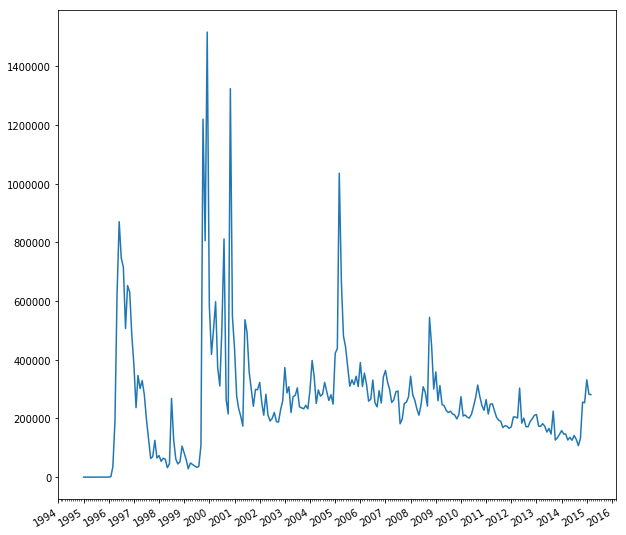

In [10]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import mysql.connector
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)
def plot(dates,y):
    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    yearsFmt = mdates.DateFormatter('%Y')


    x = [dt.datetime.strptime(d,'%m/%Y').date() for d in dates]


    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.gcf().autofmt_xdate()
    # format the ticks
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_locator(months)

    datemin = np.datetime64(x[0], 'Y')
    datemax = np.datetime64(x[-1], 'Y') + np.timedelta64(1, 'Y')
    ax.format_xdata = mdates.DateFormatter('%Y-%m')
    fig.autofmt_xdate()

    plt.show()
if __name__ == "__main__":    
    mydb = mysql.connector.connect(
        host="localhost",
        user="root",
        passwd="123456",
        database="elo7_datascience",
        get_warnings=False,
        raise_on_warnings=False
    )

    sql="""SELECT sum(rating) as qtyRating, STR_TO_DATE(concat('01/',DATE_FORMAT(timestamp,'%m/%Y')),'%d/%m/%Y') as date FROM elo7_datascience.ratings
           where rating>=3.0
           group by date
           order by date
           """

    cursor = mydb.cursor()
    cursor.execute(sql)
    y=[]
    dates=[]
    for qtyRating, date in cursor:
        y.append(qtyRating)
        dateSplitAtYearMonthDay=str(date).split("-")
        dateMonthYear=dateSplitAtYearMonthDay[1]+"/"+dateSplitAtYearMonthDay[0]
        dates.append(dateMonthYear)

    plot(dates,y)
